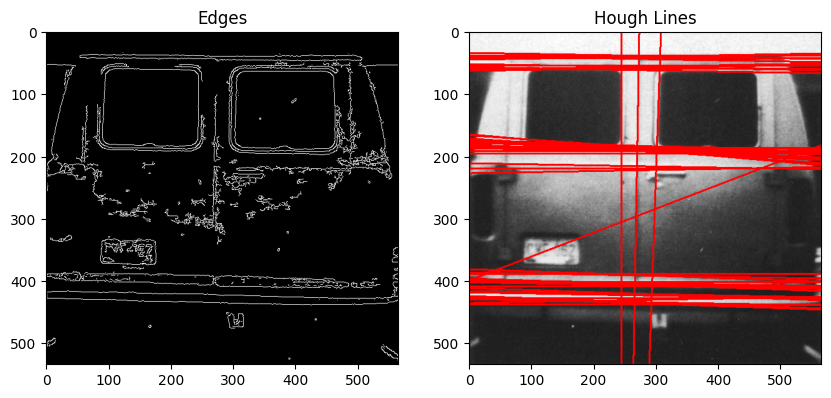

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/5.tif', cv2.IMREAD_GRAYSCALE)

# Your original Canny edge detection (keep your thresholds)
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Your original HoughLines setup (preserve your logic)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Your drawing logic (unchanged)
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Your red lines

# Your plotting style (unchanged)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Hough Lines")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

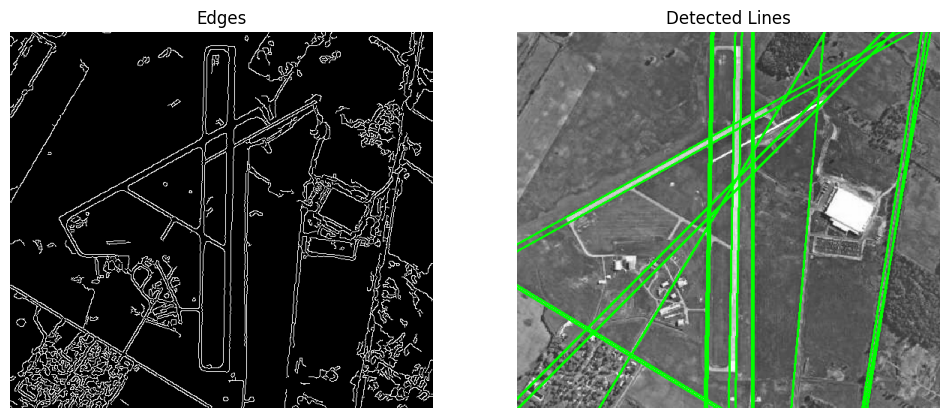

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/6.tif'  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found or could not be loaded.")

# Step 1: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Detect edges using Canny
edges = cv2.Canny(blurred, 50, 150)

# Step 3: Perform Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)  # Adjust the threshold as needed

# Step 4: Create a color copy of the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Step 5: Draw lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


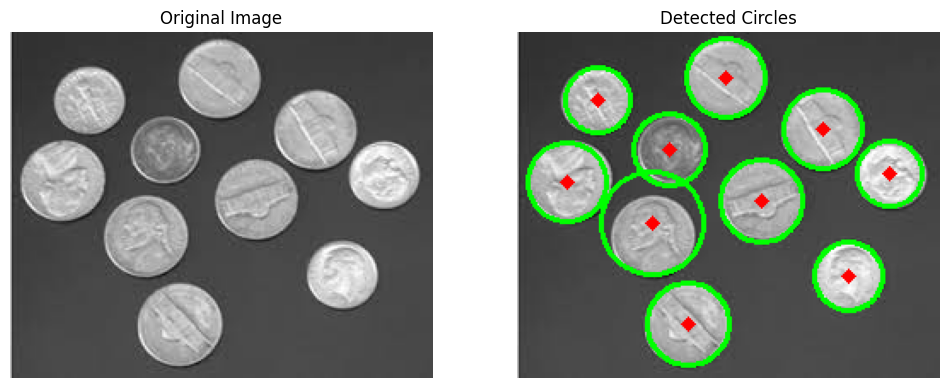

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/7.jpeg'  # Path to your uploaded image
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found or could not be loaded.")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Hough Circle Transform
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=50
)

# Draw the circles detected
output_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(output_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(output_image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Detected Circles")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


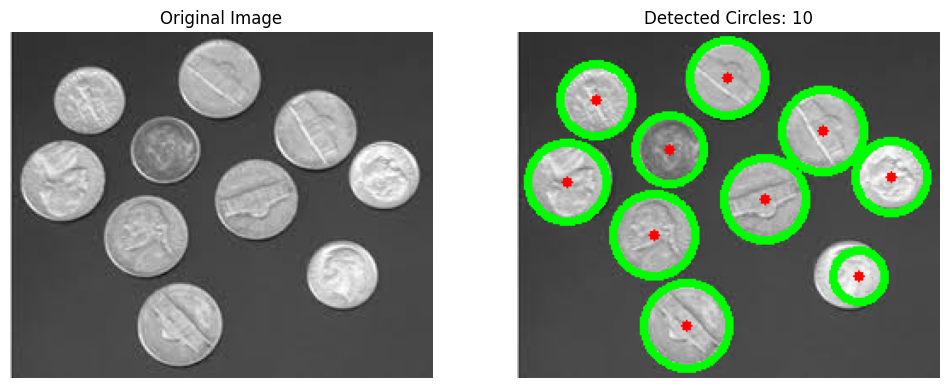

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image with enhanced error handling
image_path = '/content/7.jpeg'
image = cv2.imread(image_path)

if image is None:
    raise SystemExit(f"Error: Unable to load image at {image_path}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Improved preprocessing (optional but recommended)
blurred = cv2.medianBlur(gray, 5)  # Better noise reduction for circles

# Your Hough Circle parameters (preserved)
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=50
)

# Enhanced visualization (your style)
output_image = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle (thicker border)
        cv2.circle(output_image, (i[0], i[1]), i[2], (0, 255, 0), 3)
        # Draw center (more visible)
        cv2.circle(output_image, (i[0], i[1]), 3, (0, 0, 255), -1)  # Filled center

# Your plotting with clearer titles
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Detected Circles: {len(circles[0]) if circles is not None else 0}")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

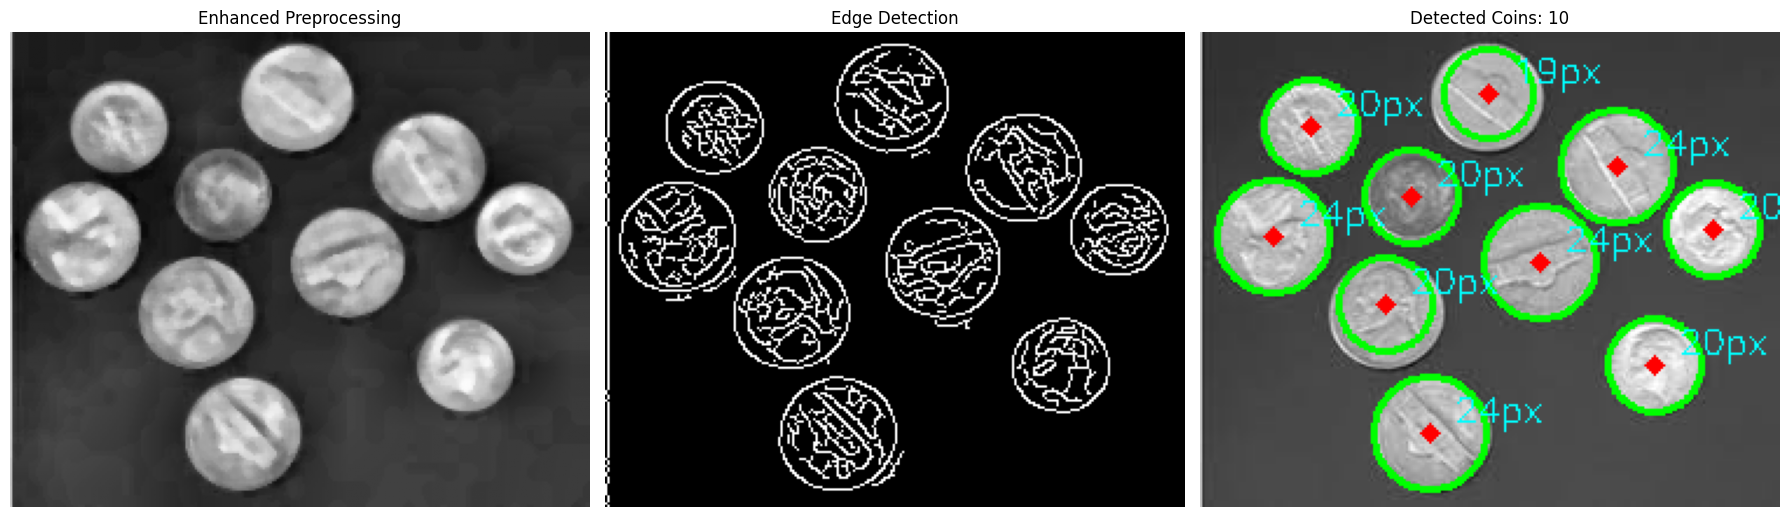

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_coins(image_path):
    # ======================
    # 1. Image Preparation
    # ======================
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Failed to load image")

    # Convert to grayscale and enhance contrast
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 5)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(blurred)

    # ======================
    # 2. Adaptive Parameters
    # ======================
    height, width = gray.shape
    avg_dim = (height + width) // 2

    params = {
        'dp': 1.1,           # Finer resolution for small coins
        'minDist': max(20, avg_dim // 15),
        'param1': 45,        # Lower edge threshold
        'param2': 25,        # Lower accumulator threshold
        'minRadius': max(5, avg_dim // 50),
        'maxRadius': avg_dim // 8
    }

    # ======================
    # 3. Multi-Stage Detection
    # ======================
    all_circles = []

    # First pass - sensitive detection
    circles = cv2.HoughCircles(enhanced, cv2.HOUGH_GRADIENT, **params)

    # Second pass (if no coins found)
    if circles is None:
        params.update({'param2': 20, 'minRadius': max(3, avg_dim // 60)})
        circles = cv2.HoughCircles(enhanced, cv2.HOUGH_GRADIENT, **params)

    # ======================
    # 4. Validation & Filtering
    # ======================
    valid_coins = []
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for (x, y, r) in circles[0]:
            # Check if coin is fully inside image
            if (x - r > 0 and x + r < width and
                y - r > 0 and y + r < height):
                valid_coins.append((x, y, r))

    # ======================
    # 5. Visualization
    # ======================
    output = img.copy()
    edge_display = cv2.Canny(enhanced, 30, 100)

    # Draw coins with radius labels
    for x, y, r in valid_coins:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)
        cv2.putText(output, f"{r}px", (x+10, y-5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    # ======================
    # 6. Diagnostic Display
    # ======================
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Enhanced Preprocessing")
    plt.imshow(enhanced, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edge_display, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Detected Coins: {len(valid_coins)}")
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Run detection
detect_coins('/content/7.jpeg')